# Assignment-4 (Perceptron, SVM, and Neural Networks)

This part of the assignment shall require you to code the perceptron classifier from the ground up. The perceptron classifier takes uses the weighted sum of input features, uses a threshold to classify between two classes. Usually these classes are -1 and 1 while the threshold is 0

In [238]:
# imports
import pandas as pd
import numpy as np
import math
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

%matplotlib inline

In [239]:
 (50464513 + 1) % 4 

2

# 1. Prepare the dataset

In [240]:
# import the assigned dataset
df = pd.read_csv('automobile.csv')

In [241]:
df.isnull().sum()

Unnamed: 0             0
length                 0
width                  0
height                 0
horsepower             0
engine-location        0
curb-weight            0
engine-size            0
peak-rpm               0
targets(body-style)    0
dtype: int64

In [242]:
df["engine-location"].value_counts()

front    202
rear       3
Name: engine-location, dtype: int64

In [243]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           205 non-null    int64  
 1   length               205 non-null    float64
 2   width                205 non-null    float64
 3   height               205 non-null    float64
 4   horsepower           205 non-null    object 
 5   engine-location      205 non-null    object 
 6   curb-weight          205 non-null    int64  
 7   engine-size          205 non-null    int64  
 8   peak-rpm             205 non-null    object 
 9   targets(body-style)  205 non-null    object 
dtypes: float64(3), int64(3), object(4)
memory usage: 16.1+ KB


In [244]:
# Preprocess the dataset
# Keeping the data ready to remove rows with '?' so all the columns will have equal number of rows.
df1 = df[['length', 'width', 'height', 'horsepower','engine-location','curb-weight','engine-size','peak-rpm', 'targets(body-style)']]
df1 = df1.loc[~df1.apply(lambda row : any('?' in str(cell) for cell in row) ,axis=1)]

encode = {'targets(body-style)': {'sedan' : 1, 'hatchback': 2 , 'wagon': 3, 'hardtop': 4, 'convertible': 5}}
df1 = df1.replace(encode)

# Dividing into predictors and response variables.
predictors_df1 = df1[['length', 'width', 'height', 'horsepower','engine-location','curb-weight','engine-size','peak-rpm']]
response_df = df1['targets(body-style)']

#Converting all features for test to same datatype
predictors_df1.loc[:,"horsepower"] = predictors_df1.loc[:,"horsepower"].astype("float")
predictors_df1.loc[:,"peak-rpm"] = predictors_df1.loc[:,"peak-rpm"].astype("float")

C:\Users\pavan\AppData\Local\Temp\ipykernel_16328\319881631.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  predictors_df1.loc[:,"horsepower"] = predictors_df1.loc[:,"horsepower"].astype("float")
C:\Users\pavan\AppData\Local\Temp\ipykernel_16328\319881631.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  predictors_df1.loc[:,"peak-rpm"] = predictors_df1.loc[:,"peak-rpm"].astype("float")


In [245]:
predictors_df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 203 entries, 0 to 204
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   length           203 non-null    float64
 1   width            203 non-null    float64
 2   height           203 non-null    float64
 3   horsepower       203 non-null    float64
 4   engine-location  203 non-null    object 
 5   curb-weight      203 non-null    int64  
 6   engine-size      203 non-null    int64  
 7   peak-rpm         203 non-null    float64
dtypes: float64(5), int64(2), object(1)
memory usage: 14.3+ KB


In [249]:
# Make a train-test split with 80% to training and 20% to testing.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(predictors_df1, response_df, stratify=response_df, test_size= 0.2 )

In [250]:
X_train["engine-location"].value_counts()

front    160
rear       2
Name: engine-location, dtype: int64

### NOTE : Need to run again from "Make train-test split with 80% to training and 20% to testing" if rear value is not 1. Since mismatch will cause later steps to fail

In [251]:

X_test["engine-location"].value_counts()

front    40
rear      1
Name: engine-location, dtype: int64

In [252]:
response_df.value_counts()

1    96
2    69
3    24
4     8
5     6
Name: targets(body-style), dtype: int64

In [253]:
# Normalize numerical features and encode the categorical features (if any)
from sklearn.preprocessing import OneHotEncoder



ohe = OneHotEncoder(handle_unknown='ignore', sparse = False)
obj = X_train.select_dtypes('object')
enc = pd.DataFrame(ohe.fit_transform(obj), columns=['engine-location_front', 'engine-location_rear'])
enc.index = X_train.index
X_train_enc = pd.concat([X_train.select_dtypes(exclude = 'object'),
                         enc], axis = 1)

ohe = OneHotEncoder(handle_unknown='ignore', sparse = False)
obj = X_test.select_dtypes('object')
enc = pd.DataFrame(ohe.fit_transform(obj), columns=['engine-location_front', 'engine-location_rear'])
enc.index = X_test.index
X_test_enc = pd.concat([X_test.select_dtypes(exclude = 'object'),
                         enc], axis = 1)






In [254]:
X_train_norm = StandardScaler().fit_transform(X_train_enc)
X_test_norm = StandardScaler().fit_transform(X_test_enc)

As this is a classification problem, the target variables must be categorical. Using the feature and target variable information, preprocess the dataset to use given features.

This step might require students to scale the features, one-hot encode categorical FEATURES (if any).



For feature scaling and one-hot encoding, go through:

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html

# 2: Creating a perceptron model for the processed dataset

The perceptron.py file in the resources provides functions to code the perceptron model from scratch.

Using the file as reference, write the functions:

1. cross_validation_split
2. accuracy_metric
3. evaluate_algorithm
4. predict
5. train_weights
6. perceptron

This step is aimed at providing a comprehensive understanding of the internal functioning of a perceptron model.

In [255]:
# your code for step 2
from random import seed
from random import randrange
# Split a dataset into k folds
def cross_validation_split(dataset, n_folds):
	dataset_split = list()
	dataset_copy = list(dataset)
	fold_size = int(len(dataset) / n_folds)
	for i in range(n_folds):
		fold = list()
		while len(fold) < fold_size:
			index = randrange(len(dataset_copy))
			fold.append(dataset_copy.pop(index))
		dataset_split.append(fold)
	return dataset_split

# Calculate accuracy percentage
def accuracy_metric(actual, predicted):
	correct = 0
	for i in range(len(actual)):
		if actual[i] == predicted[i]:
			correct += 1
	return correct / float(len(actual)) * 100.0

# Evaluate an algorithm using a cross validation split
def evaluate_algorithm(dataset, algorithm, n_folds, *args):
	folds = cross_validation_split(dataset, n_folds)
	scores = list()
	for fold in folds:
		train_set = list(folds)
		train_set.remove(fold)
		train_set = sum(train_set, [])
		test_set = list()
		for row in fold:
			row_copy = list(row)
			test_set.append(row_copy)
			row_copy[-1] = None
		predicted = algorithm(train_set, test_set, *args)
		actual = [row[-1] for row in fold]
		accuracy = accuracy_metric(actual, predicted)
		scores.append(accuracy)
	return scores

# Make a prediction with weights
def predict(row, weights):
	activation = weights[0]
	for i in range(len(row)-1):
		activation += weights[i + 1] * row[i]
	return 1.0 if activation >= 0.0 else 0.0

# Estimate Perceptron weights using stochastic gradient descent
def train_weights(train, l_rate, n_epoch):
	weights = [0.0 for i in range(len(train[0]))]
	for epoch in range(n_epoch):
		for row in train:
			prediction = predict(row, weights)
			error = row[-1] - prediction
			weights[0] = weights[0] + l_rate * error
			for i in range(len(row)-1):
				weights[i + 1] = weights[i + 1] + l_rate * error * row[i]
	return weights

# Perceptron Algorithm With Stochastic Gradient Descent
def perceptron(train, test, l_rate, n_epoch):
	predictions = list()
	weights = train_weights(train, l_rate, n_epoch)
	for row in test:
		prediction = predict(row, weights)
		predictions.append(prediction)
	return(predictions)

In [256]:
dataset = np.column_stack([X_train_norm, y_train])
dataset = dataset.tolist()

In [257]:
# your code for step 2
seed(1)
n_folds = 3
l_rate = 0.01
n_epoch = 500
scores = evaluate_algorithm(dataset, perceptron, n_folds, l_rate, n_epoch)
print('Scores: %s' % scores)
print('Mean Accuracy: %.3f%%' % (sum(scores)/float(len(scores))))

Scores: [42.592592592592595, 51.85185185185185, 48.148148148148145]
Mean Accuracy: 47.531%


# (Bonus) Perceptron model with relaxation

Using Relaxation (the descent theorem), compare the performance of perceptron model with and without relaxation (refer class lectures, slides for details on relaxation).

Make modifications to the loss function in the perceptron model.

In [258]:
# code for relaxation for the perceptron model

# 3: Batch size for perceptron model

Experiment with different batch sizes in the perceptron model (eg: 1, 4, 8).

Report (with figures) the difference in performance when using different batch sizes. Inferences without plots might not be awarded points.

Report the accuracies for various combinations of batch sizes.

In [259]:
# code for step 3
seed(1)
n_folds = 5
l_rate = 0.01
n_epoch = 500
scores = evaluate_algorithm(dataset, perceptron, n_folds, l_rate, n_epoch)
print('Scores: %s' % scores)
print('Mean Accuracy: %.3f%%' % (sum(scores)/float(len(scores))))

Scores: [40.625, 50.0, 43.75, 53.125, 46.875]
Mean Accuracy: 46.875%


In [260]:
# code for step 3
seed(1)
n_folds = 7
l_rate = 0.01
n_epoch = 500
scores = evaluate_algorithm(dataset, perceptron, n_folds, l_rate, n_epoch)
print('Scores: %s' % scores)
print('Mean Accuracy: %.3f%%' % (sum(scores)/float(len(scores))))

Scores: [52.17391304347826, 34.78260869565217, 47.82608695652174, 43.47826086956522, 60.86956521739131, 34.78260869565217, 56.52173913043478]
Mean Accuracy: 47.205%


In [261]:
# code for step 3
seed(1)
n_folds = 9
l_rate = 0.01
n_epoch = 500
scores = evaluate_algorithm(dataset, perceptron, n_folds, l_rate, n_epoch)
print('Scores: %s' % scores)
print('Mean Accuracy: %.3f%%' % (sum(scores)/float(len(scores))))

Scores: [55.55555555555556, 27.77777777777778, 44.44444444444444, 50.0, 50.0, 55.55555555555556, 44.44444444444444, 33.33333333333333, 66.66666666666666]
Mean Accuracy: 47.531%


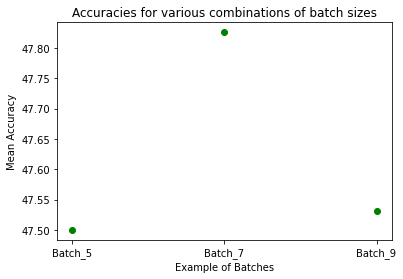

In [262]:
accuracy = {'Batch_5':47.500, 'Batch_7':47.826, 'Batch_9':47.531}
Batches = list(accuracy.keys())
Accuracy = list(accuracy.values())
plt.xlabel("Example of Batches")                                    
plt.ylabel("Mean Accuracy") 
plt.title("Accuracies for various combinations of batch sizes")
plt.scatter(Batches, Accuracy, color ='green')                                  
plt.show()
 

# 4. SVM's

### **Note : You are allowed to use sklearn's SVC classifier for steps 4.1 through 4.3**

https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

---

# 4.1 Linear SVM


---


# Step 1: Implement a linear SVM model to classify the data points. (Look into the 'kernel' parameter).

In [263]:
# linear SVM
from sklearn.svm import SVC

svm_clf = SVC(kernel= "linear")


# Step 2: Train the model

In [264]:
# training - linear SVM
svm_clf.fit(X_train_norm, y_train)

SVC(kernel='linear')

# Step 3: Predict for the test points using the model trained in the previous step

In [265]:
# predict - linear SVM
y_pred_lin = svm_clf.predict(X_test_norm)
y_pred_lin

array([1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 2, 2, 5, 2,
       1, 1, 2, 1, 1, 1, 2, 2, 2, 1, 1, 2, 3, 1, 2, 1, 1, 2, 1],
      dtype=int64)

In [266]:
#svm_clf.score(X_test_norm, y_test)

# 4.2 Kernel SVM - Polynomial kernel

---



# Step 1: Implement a kernel SVM model with a polynomial kernel to classify the data points.

In [267]:
# kernel SVM - polynomial kernel
svm_poly = SVC(kernel='poly', degree = 3, C = 1)

# Step 2: Train the model

In [268]:
# training - kernel SVM
svm_poly.fit(X_train_norm, y_train)

SVC(C=1, kernel='poly')

# Step 3: Predict for the test points using the model trained in the previous step

In [269]:
# predict - kernel SVM
y_pred_poly = svm_poly.predict(X_test_norm)

# 4.3 Kernel SVM - Gaussian kernel

---



# Step 1: Implement a kernel SVM model with a gaussian (Radian Basis function) kernel to classify the data points.

In [270]:
# kernel SVM - gaussian kernel
svm_rbf = SVC(kernel='rbf', degree=3, C = 1)

# Step 2: Train the model

In [271]:
# training - kernel SVM
svm_rbf.fit(X_train_norm, y_train)

SVC(C=1)

# Step 3: Predict for the test points using the model trained in the previous step

In [272]:
# predict - kernel SVM
y_pred_rbf = svm_rbf.predict(X_test_norm)

# 4.4 - Evaluation


---


# Take the results from each predict step under sections 4.1, 4.2 and 4.3. Consider accuracy as the evaulation metric. Print the accuracies for each of the 3 SVM models.

Note: Do not use functions from sklearn.metrics

In [273]:
svm_clf.score(X_test_norm, y_test)

0.6829268292682927

In [274]:
svm_poly.score(X_test_norm, y_test)

0.6341463414634146

In [275]:
svm_rbf.score(X_test_norm, y_test)

0.7317073170731707

In [276]:
# space for any imports for the following steps
#import tensorflow as tf
# space for any imports for the following steps

import numpy as np
import keras
from keras.datasets import mnist
from keras.optimizers import SGD
from keras.layers import Dense
from keras.models import Sequential

from keras import regularizers

from keras.callbacks import LambdaCallback

input_layer = 9
middle_layer = 9
out_layer = 1

epochs = 30
learning_rate = 0.1
Lambda = 10
batch_size = 10

# 5. Neural Networks



---



# 5.1 Single layer neural network

You can use either PyTorch or Tensorflow for the implementation

---

# Step 1: Implement a single layer neural network to classify the data points

In [277]:
model = Sequential()
model.add(Dense(input_layer, activation='sigmoid', input_dim = 9))
model.add(Dense(out_layer, activation="softmax"))
sgd = SGD(learning_rate=learning_rate)

In [278]:
model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])

# Step 2: Train the model

In [279]:
layer_w = []
weights = LambdaCallback(on_epoch_end=lambda epoch, 
                         logs: layer_w.append(model.layers[0].get_weights()))


history = model.fit(X_train_norm, y_train, epochs=epochs,
                    batch_size=batch_size, verbose=0, validation_split=0, 
                 callbacks=[weights])

# Step 3: Predict for the test points using the model trained in the previous step

In [280]:
loss_nn1, accuracy_nn1 = model.evaluate(X_test_norm, y_test, batch_size= batch_size, verbose=False)

# 5.2 Multi - Layer neural network

---

# Step 1: Implement a multi - layer neural network to classify the data points

Additional note: use methods to avoid overfitting appropriately

In [281]:
model_2 = Sequential()
model_2.add(Dense(input_layer, activation='sigmoid', input_dim = 9, 
                kernel_regularizer= regularizers.l2(Lambda)))

model_2.add(Dense(middle_layer, activation='sigmoid',
                kernel_regularizer= regularizers.l2(Lambda) ))

model_2.add(Dense(out_layer, activation="softmax"))
sgd = SGD(learning_rate=learning_rate)

# Step 2: Train the model

In [282]:
model_2.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])

In [283]:
layer_w = []
weights = LambdaCallback(on_epoch_end=lambda epoch, 
                         logs: layer_w.append(model_2.layers[0].get_weights()))


history = model_2.fit(X_train_norm, y_train, epochs=epochs,
                    batch_size=batch_size, verbose=0, validation_split=0, 
                     callbacks=[weights])

# Step 3: Predict for the test points using the model trained in the previous step

In [284]:
loss_nn2, accuracy_nn2 = model_2.evaluate(X_test_norm, y_test, batch_size= batch_size, verbose=False)

# 5.3 Multi - Layer neural network

---

# Step 1: Implement a multi - layer neural network to classify the data points

**Note :** This must have a different network architecture from the model under section 5.2

**Additional note:** use methods to avoid overfitting appropriately

In [285]:
model_3 = Sequential()
model_3.add(Dense(input_layer, activation='sigmoid', input_dim = 9, 
                kernel_regularizer= regularizers.l2(Lambda)))

model_3.add(Dense(middle_layer, activation='sigmoid',
                kernel_regularizer= regularizers.l2(Lambda) ))

model_3.add(Dense(middle_layer, activation='sigmoid',
                kernel_regularizer= regularizers.l2(Lambda) ))

model_3.add(Dense(middle_layer, activation='sigmoid',
                kernel_regularizer= regularizers.l2(Lambda) ))

model_3.add(Dense(middle_layer, activation='sigmoid',
                kernel_regularizer= regularizers.l2(Lambda) ))

model_3.add(Dense(middle_layer, activation='sigmoid',
                kernel_regularizer= regularizers.l2(Lambda) ))

model_3.add(Dense(middle_layer, activation='sigmoid',
                kernel_regularizer= regularizers.l2(Lambda) ))

model_3.add(Dense(out_layer, activation="softmax"))
sgd = SGD(learning_rate=0.05)

# Step 2: Train the model

In [286]:
model_3.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])

In [287]:
layer_w = []
weights = LambdaCallback(on_epoch_end=lambda epoch, 
                         logs: layer_w.append(model_3.layers[0].get_weights()))


history = model_3.fit(X_train_norm, y_train, epochs=epochs,
                    batch_size=batch_size, verbose=0, validation_split=0, 
                    callbacks=[weights])

# Step 3: Predict for the test points using the model trained in the previous step

In [288]:
loss_nn3, accuracy_nn3 = model_3.evaluate(X_test_norm, y_test, batch_size= batch_size, verbose=False)

# 5.4 - Evaluation


---


# Take the results from each predict step under sections 5.1, 5.2 and 5.3. Consider accuracy as the evaulation metric. Print the accuracies for each of the 3 neural network architectures.

Note: Do not use functions from sklearn.metrics

In [289]:
print("The accuracy of single neural network is ",accuracy_nn1)

The accuracy of single neural network is  0.46341463923454285


In [290]:
print("The accuracy of multilayer neural network with two hidden layers is ",accuracy_nn2)

The accuracy of multilayer neural network with two hidden layers is  0.46341463923454285


In [291]:
print("The accuracy of multilayer neural network with more hidden layers is ", accuracy_nn3)

The accuracy of multilayer neural network with more hidden layers is  0.46341463923454285


# 6 - Paragraph questions

---



# Q1 : Briefly explain the methods you used to prevent overfitting for the models under section 5.2 and 5.3

***space for Q1's answer***
I used regulatizer to prevent overfitting.

# Q2: Compare the performances of models under sections 2, 3, 4 and 5 namely perceptron, descent procedure, SVM's and neural networks. List down few points on why you think certain models performed better than others

***space for Q2's answer***
For section 2 following parameters were used folds, rate and epoch. Mean Accuracy acheived was 47% and Scores: [53.70370370370371, 40.74074074074074, 48.148148148148145]

For section 3 with different n_folds Scores different but mean accuracy remained almost constant.That is around 47%
Details: 
n_folds = 5
Scores: [50.0, 56.25, 43.75, 34.375, 53.125]
Mean Accuracy: 47.500%
n_folds = 7
Scores: [43.47826086956522, 56.52173913043478, 56.52173913043478, 39.130434782608695, 39.130434782608695, 34.78260869565217, 65.21739130434783]
Mean Accuracy: 47.826%
n_folds = 9
Scores: [38.88888888888889, 61.111111111111114, 61.111111111111114, 38.88888888888889, 38.88888888888889, 44.44444444444444, 38.88888888888889, 44.44444444444444, 61.111111111111114]
Mean Accuracy: 47.531%

For Section 4 SVM's
Linear SVM has an accuracy of 68%.
Kernel SVM - Polynomial kernel has an accuracy of 63%.
Kernel SVM - Gaussian kernel has an accuracy of 73%.
Kernel SVM seems to perform the best

For section 5 I am getting all same accuracy even when hidden layers are added. That is 46%